# Seaborn Library

built on top of matplotlib to enhance visualization

In [110]:
# 1) import libraries & dataset
from datasets import load_dataset
from datetime import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns # seaborn 
import ast
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# 2) format job_posted date in datetime (it was string)
df.job_posted_date = pd.to_datetime(df.job_posted_date)

# 3) add column job posted month to convert job posted datetime
df['job_posted_month'] = df.job_posted_date.dt.month

# 4) convert 'job_skills' into list
df['job_skills'] = df['job_skills'].apply(lambda skill_list: ast.literal_eval(skill_list) if pd.notna(skill_list) else skill_list)

In [111]:
df_da_us =df[(df['job_title_short']=='Data Analyst') & (df['job_country']=='United States')].copy()
df_da_us = df_da_us.dropna(subset='salary_year_avg')

#### Bar Chart

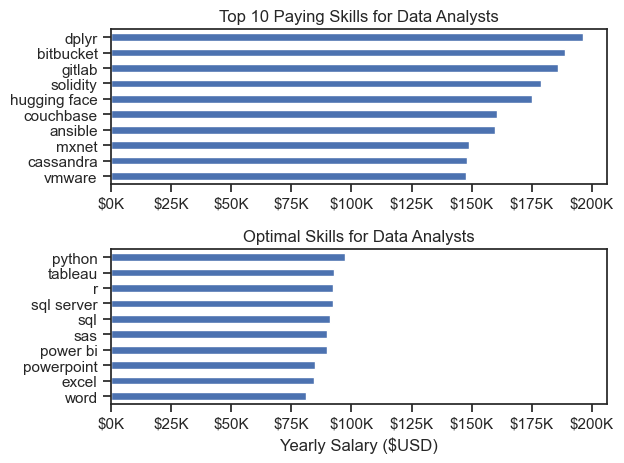

In [112]:
df_explode = df_da_us.explode('job_skills')
df_group = df_explode.groupby('job_skills')['salary_year_avg'].agg(['count', 'median'])

df_top_pay = df_group.sort_values(by='median', ascending=False).head(10)
df_top_skills = df_group.sort_values(by='count', ascending=False).head(10)
df_top_skills = df_top_skills.sort_values(by='median', ascending=False)

fig, ax = plt.subplots(2,1)

df_top_pay.plot(kind='barh', ax=ax[0], y='median', legend=False)
ax[0].set_title(f'Top 10 Paying Skills for Data Analysts')
ax[0].set_ylabel('')

df_top_skills.plot(kind='barh', ax=ax[1], y='median',legend=False)
ax[1].set_title(f'Optimal Skills for Data Analysts')
ax[1].set_ylabel('')


# format x axis
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))

# order first chart by salary 
ax[0].invert_yaxis()
ax[1].invert_yaxis()

# set equal the 2 x axis
ax[1].set_xlim(ax[0].get_xlim())

# set x label 
ax[1].set_xlabel('Yearly Salary ($USD)')

# print
plt.tight_layout()
plt.show()


key remarks:
- "hue" indicates where the palette is applied
- "palette" wants a string
- x value is usually what is y in matplotlib
- y value is the column name (therefore the index of the df)

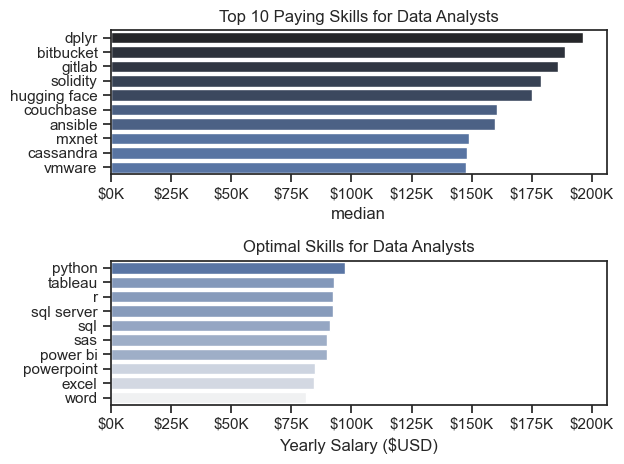

In [113]:
fig, ax = plt.subplots(2,1)

sns.set_theme(style="ticks")

# df_top_pay.plot(kind='barh', ax=ax[0], y='median', legend=False)
sns.barplot(data=df_top_pay, x='median', y=df_top_pay.index, ax=ax[0], hue='median', palette='dark:b_r')
ax[0].set_title(f'Top 10 Paying Skills for Data Analysts')
ax[0].set_ylabel('')
ax[0].legend().remove()

# df_top_skills.plot(kind='barh', ax=ax[1], y='median',legend=False)
sns.barplot(data=df_top_skills, x='median', y=df_top_skills.index, ax=ax[1], hue='median', palette='light:b')
ax[1].set_title(f'Optimal Skills for Data Analysts')
ax[1].set_ylabel('')
ax[1].legend().remove()

# format x axis
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))

# no need to invert axes in this case

# set equal the 2 x axes
ax[1].set_xlim(ax[0].get_xlim())

# set x label 
ax[1].set_xlabel('Yearly Salary ($USD)')

# print
plt.tight_layout()
plt.show()

#### Histogram 

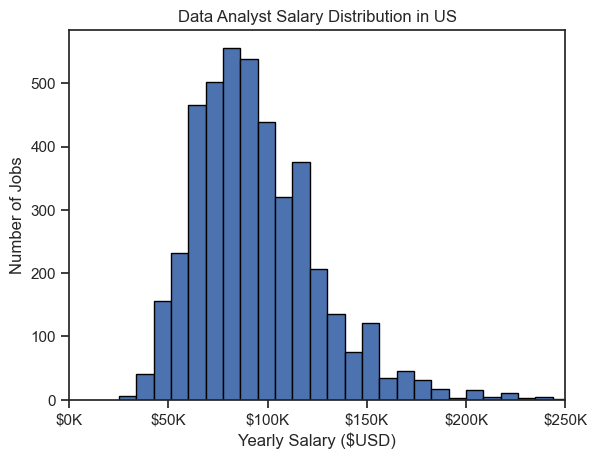

In [114]:
df_da_us = df[(df['job_title_short']=='Data Analyst') & (df['job_country']=='United States')].copy()
df_da_us['salary_year_avg'].plot(
    kind='hist',
    bins=40, #number of columns of the distribution, default=10
    edgecolor='black', #borders of the bins
    title='Data Analyst Salary Distribution in US',
    xlabel='Yearly Salary ($USD)',
    ylabel='Number of Jobs'
)
plt.xlim(0, 250000) #set limit to exclude outliers form the distribution
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))
plt.show()

Parameters:
- data --> name of the df
- x & y --> columns names

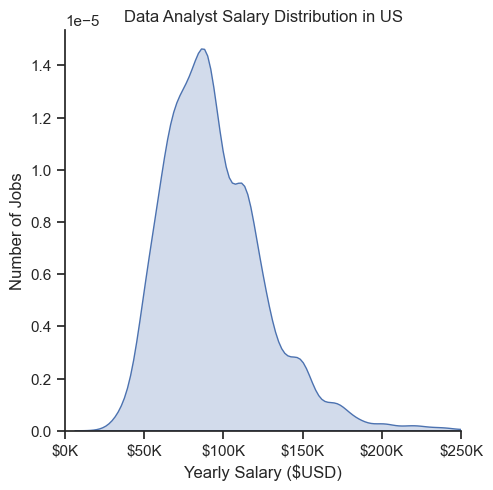

In [115]:
df_da_us = df[(df['job_title_short']=='Data Analyst') & (df['job_country']=='United States')].copy()

sns.displot(df_da_us['salary_year_avg'], kind='kde', fill=True)
plt.title('Data Analyst Salary Distribution in US')
plt.xlabel('Yearly Salary ($USD)')
plt.ylabel('Number of Jobs')
plt.xlim(0, 250000) #set limit to exclude outliers form the distribution
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))
plt.show()

#### Box Plot

C:\Users\loren\AppData\Local\Temp\ipykernel_37556\4186176214.py:10: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(job_list, labels=job_titles, vert=False)


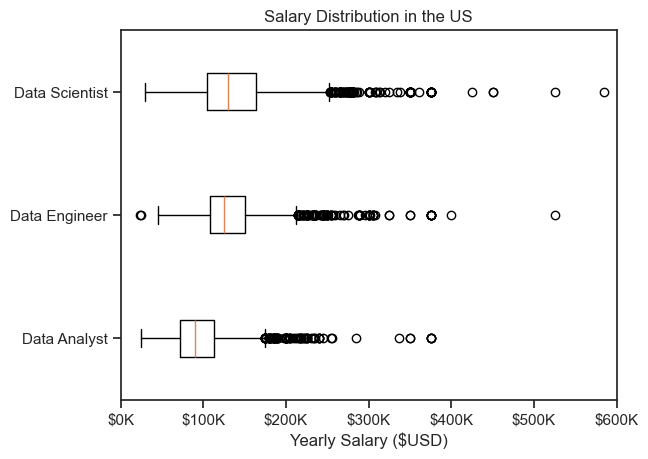

In [116]:
job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']

# df filtered by nedtherlands and the list of job titles + drop emplty salaries
df_us = df[(df['job_title_short'].isin(job_titles)) & (df['job_country']=='United States')].copy()
df_us = df_us.dropna(subset='salary_year_avg')

# create a list with list comprehension including salaries for each job 
job_list = [df_us[df_us['job_title_short']==job_title]['salary_year_avg'] for job_title in job_titles]

plt.boxplot(job_list, labels=job_titles, vert=False)
plt.title('Salary Distribution in the US')
plt.xlabel('Yearly Salary ($USD)')
plt.xlim(0, 600_000)
ax=plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))
plt.show()

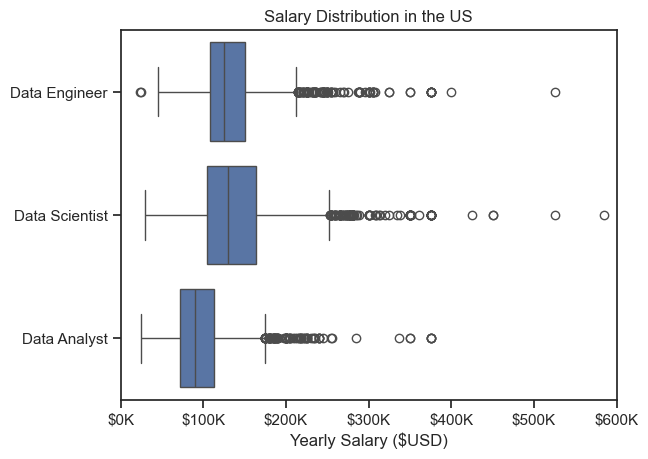

In [117]:
sns.boxplot(data=df_us, x='salary_year_avg', y='job_title_short')

plt.title('Salary Distribution in the US')
plt.xlabel('Yearly Salary ($USD)')
plt.ylabel('')
plt.xlim(0, 600_000)
ax=plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))
plt.show()

### Exercises


🟩 Top Companies Bar Plot (2.20.1) - Problem
2️⃣ Advanced - Seaborn 🌊
Problem Statement:

Create a Seaborn bar plot to visualize the top 5 companies with the highest median salary_year_avg for Data Scientist job postings in the United States.
Hint:

Use sns.barplot() to create the bar plot and sort the companies by median salary.


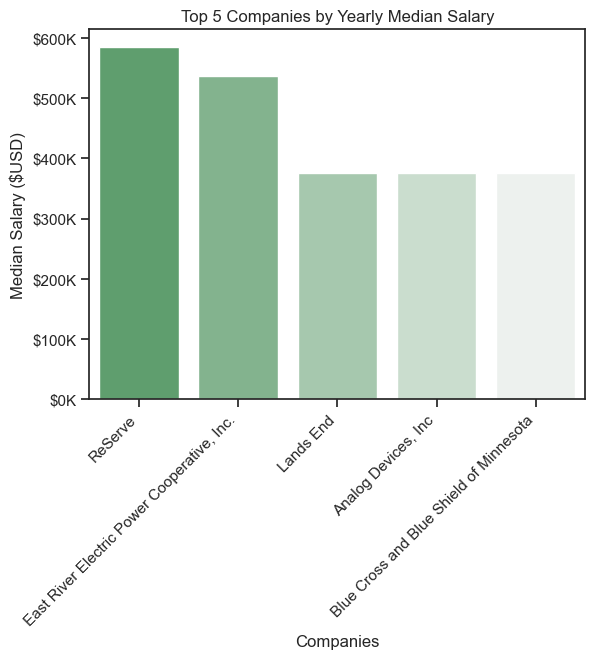

In [118]:
import seaborn as sns

df_top_company = df[(df['job_title_short'] == 'Data Scientist') & (df['job_country'] == 'United States')].dropna(subset='salary_year_avg').copy()
top_company = df_top_company.groupby('company_name')['salary_year_avg'].median().reset_index()
top_company = top_company.sort_values(by='salary_year_avg', ascending=False).head(5).set_index('company_name')

sns.set_theme(style="ticks")
sns.barplot(data=top_company, x=top_company.index, y='salary_year_avg', hue='company_name', palette='light:g_r')
plt.xticks(rotation = 45, ha='right')
plt.xlabel('Companies')
plt.ylabel('Median Salary ($USD)')
plt.title('Top 5 Companies by Yearly Median Salary')

ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))

plt.show()

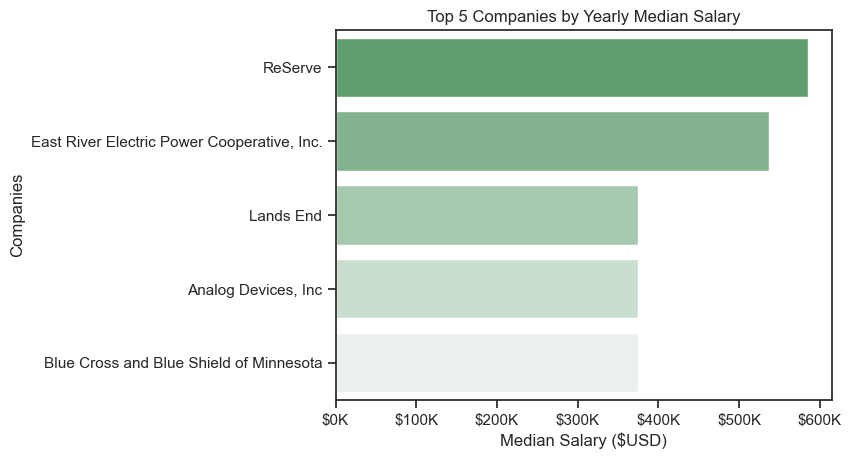

In [119]:
import seaborn as sns

df_top_company = df[(df['job_title_short'] == 'Data Scientist') & (df['job_country'] == 'United States')].dropna(subset='salary_year_avg').copy()
top_company = df_top_company.groupby('company_name')['salary_year_avg'].median().reset_index()
top_company = top_company.sort_values(by='salary_year_avg', ascending=False).head(5).set_index('company_name')

sns.set_theme(style="ticks")
sns.barplot(data=top_company, y=top_company.index, x='salary_year_avg', hue='company_name', palette='light:g_r')
plt.ylabel('Companies')
plt.xlabel('Median Salary ($USD)')
plt.title('Top 5 Companies by Yearly Median Salary')

ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))

plt.show()

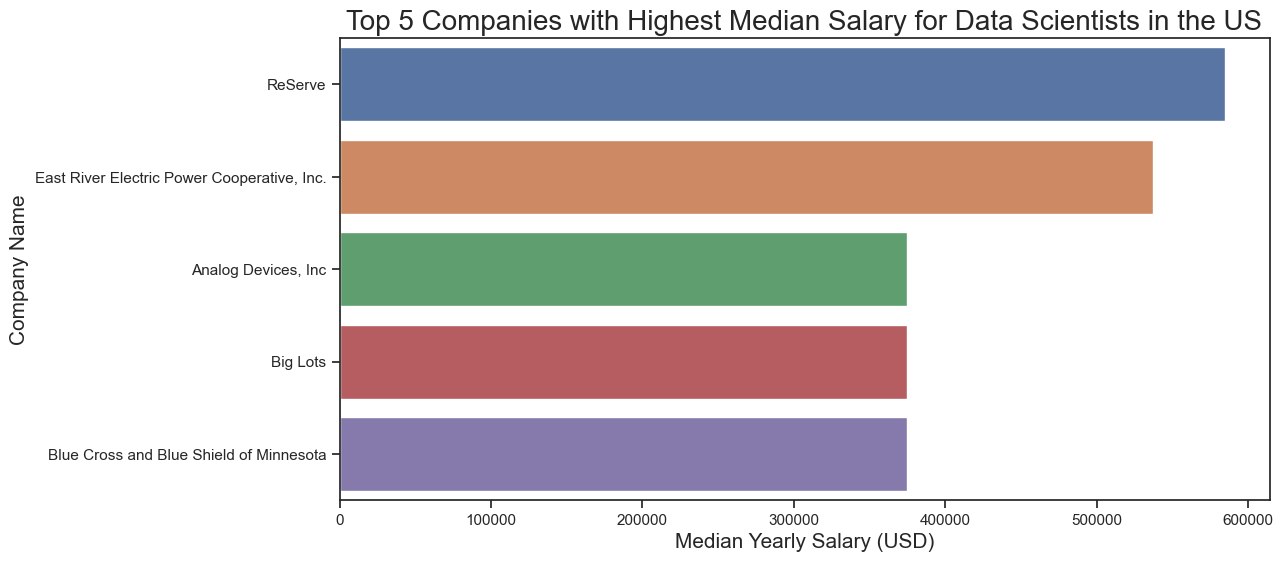

In [120]:
import pandas as pd
from datasets import load_dataset
import seaborn as sns
import matplotlib.pyplot as plt

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df_DS_US = df[(df['job_title_short'] == 'Data Scientist') & (df['job_country'] == 'United States')].dropna(subset=['salary_year_avg']).copy()
top_companies = df_DS_US.groupby('company_name')['salary_year_avg'].median().nlargest(5).reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=top_companies, x='salary_year_avg', y='company_name', hue='company_name')
plt.title('Top 5 Companies with Highest Median Salary for Data Scientists in the US', fontsize=20)
plt.figsize=(12,6)
plt.xlabel('Median Yearly Salary (USD)', fontsize=15)
plt.ylabel('Company Name', fontsize=15)
plt.show()

🟨 Data Scientist Salary Histogram (2.20.2) - Problem
2️⃣ Advanced - Seaborn 🌊
Problem Statement:

Create a histogram using Seaborn to visualize the distribution of average yearly salaries (use the salary_year_avg column) for Data Scientist job postings in the United States:

- Filter the DataFrame to include only job postings in the United States and remove any entries with missing yearly salary values.
- Use 25 bins for the histogram and set the x-axis limit to 700,000.
- Set the title to 'Distribution of Yearly Salaries for Data Scientist in the United States' and label the y-axis 'Number of Jobs' and x-axis 'Yearly Salary (USD)'.

Hint:

Use the sns.histplot() function to create the histogram and filter the DataFrame using boolean indexing.

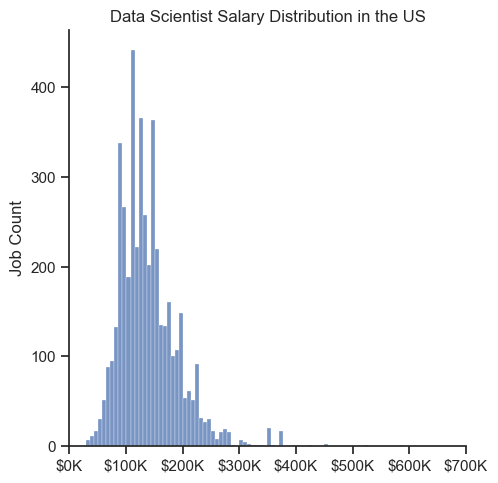

In [121]:
df_DS_US = df[(df['job_title_short'] == 'Data Scientist') & (df['job_country'] == 'United States')].dropna(subset=['salary_year_avg']).copy()

sns.displot(data=df_DS_US['salary_year_avg'], kind='hist', fill=True, common_norm=False)

ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))
plt.xlim(0,700_000)
plt.title('Data Scientist Salary Distribution in the US')
plt.xlabel('')
plt.ylabel('Job Count')
plt.show()

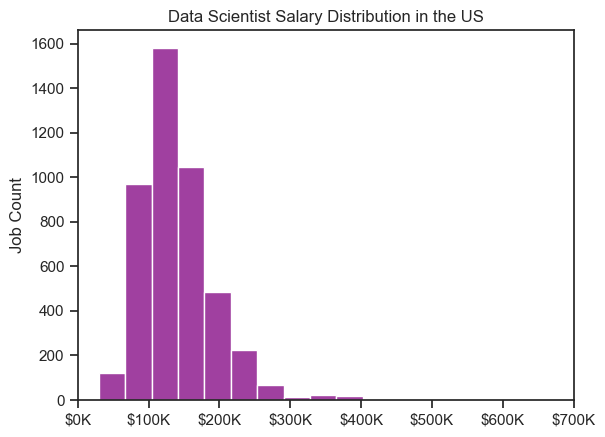

In [122]:
df_DS_US = df[(df['job_title_short'] == 'Data Scientist') & (df['job_country'] == 'United States')].dropna(subset=['salary_year_avg']).copy()

sns.histplot(data=df_DS_US['salary_year_avg'], bins=25, color='purple')

ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))
plt.xlim(0,700_000)
plt.title('Data Scientist Salary Distribution in the US')
plt.xlabel('')
plt.ylabel('Job Count')
plt.show()

🟨 Data Roles Salary Box Plot (2.20.3) - Problem
2️⃣ Advanced - Seaborn 🌊
Problem Statement:

Create a box plot using Seaborn to compare the yearly salaries (use the salary_year_avg column) of Data Analyst, Data Engineer, and Data Scientist job postings in India:

- Filter the DataFrame to include only job postings in India and remove any entries with missing yearly salary values.
- Set the x-axis limit to 300,000 and format it as $100k.
- Set the title to 'Yearly Salary Comparison for Data Roles in India' and label the x-axis as 'Yearly Salary (USD)'.


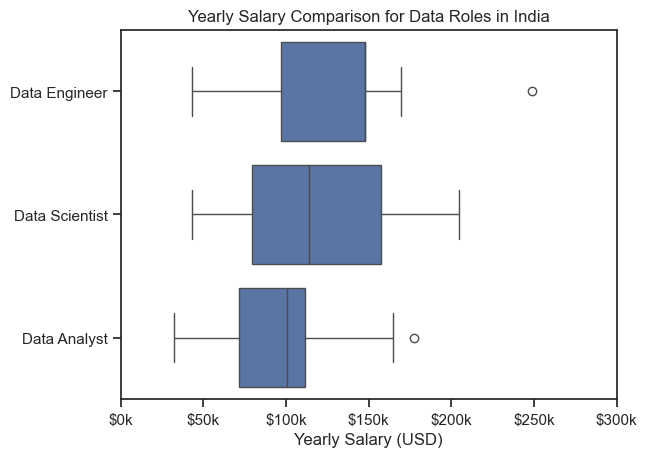

In [123]:
job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']

df_in = df[(df['job_country']=='India')&(df['job_title_short'].isin(job_titles))].dropna(subset='salary_year_avg').copy()

sns.boxplot(data=df_in, y='job_title_short', x='salary_year_avg')
plt.title('Yearly Salary Comparison for Data Roles in India')
plt.xlabel('Yearly Salary (USD)')
plt.ylabel('')
plt.xlim(0, 300000)
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}k'))

plt.show()

🟨 Salary Distribution for United States (2.20.4) - Problem
2️⃣ Advanced - Seaborn 🌊
Problem Statement:

- Create a violin plot using Seaborn to visualize the distribution of salary_year_avg for Data Scientist roles in the United States.
- Ensure the plot includes a title, axis labels, and custom formatting for the salary axis.

Hint:

- Use sns.violinplot() with the x parameter set to job_country and the y parameter set to salary_year_avg.
- Utilize plt.ylim() and plt.gca().yaxis.set_major_formatter() to set and format the salary axis.


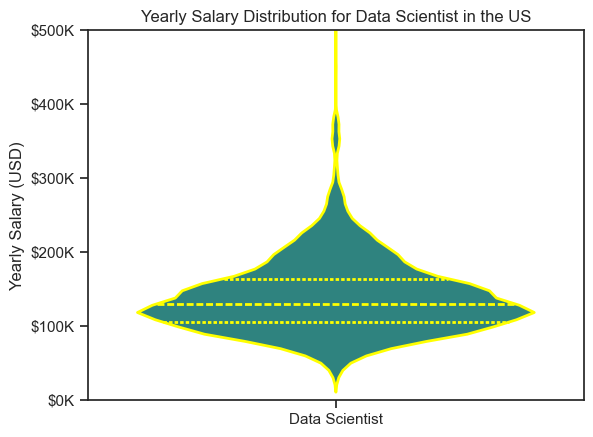

In [157]:
df_ds_us = df[(df['job_title_short'] == 'Data Scientist') & (df['job_country'] == 'United States')].dropna(subset=['salary_year_avg']).copy()
sns.violinplot(
    data=df_ds_us, 
    y='salary_year_avg', 
    x='job_title_short',
    hue='job_title_short',
    inner='quartile', 
    width=0.8,
    palette='viridis', 
    orient='x',
    fill=True,
    linecolor='yellow',
    linewidth=2,
)
plt.title('Yearly Salary Distribution for Data Scientist in the US')
plt.ylabel('Yearly Salary (USD)')
plt.xlabel('')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))
plt.ylim(0, 500000)
plt.show()